In [1]:
# Import Stuff
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
### Import data and transform
# Load data
data_og = pd.read_csv('/Users/Timmy/OneDrive - Stanford/Documents/Personal/Projects/Spoon Survey/Data 31 People.csv')

data = data_og.copy()
data = data.rename(columns={'You must include your name (first and last name)': 'Name'})
data = data.drop('Timestamp', axis=1)

# Andrew did a 1-10 scale, multiply all results by 10
mask = data['Name'] == 'Andrew Jiang'
data.loc[mask, data.columns != 'Name'] *= 10
data = data.replace("Tf? 1", 1) # Amanda was being funny, replace text with integer response

Spoons sorted by mean score!


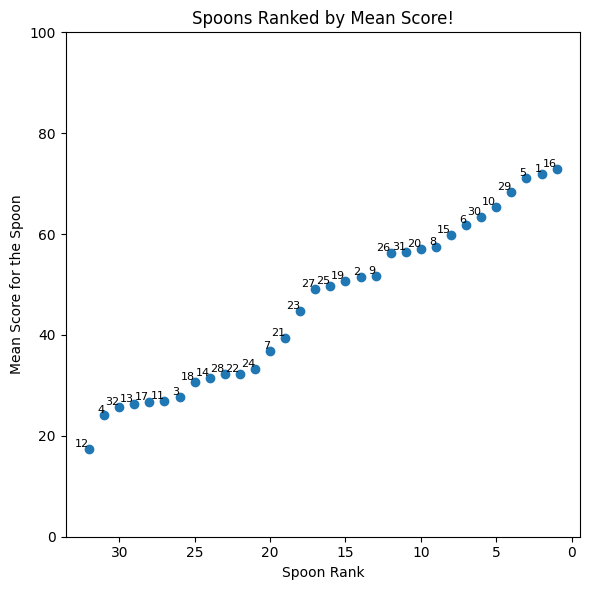

In [3]:
### Simple Stats
# Best and worst spoons
print("Spoons sorted by mean score!")
spoon_means = data.drop(columns='Name').mean().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
x_vals = range(1, len(spoon_means) + 1)
plt.scatter(x_vals, spoon_means)

# Add text labels for each point (spoon name)
for x, y, label in zip(x_vals, spoon_means, spoon_means.index):
    short_label = label.replace("Spoon ", "")
    plt.text(x, y, short_label, fontsize=8, ha='right', va='bottom')

plt.xlabel("Spoon Rank")
plt.gca().invert_xaxis()
plt.ylabel("Mean Score for the Spoon")
plt.ylim(0, 100)
plt.title("Spoons Ranked by Mean Score!")
plt.tight_layout()
plt.show()

spoon_means_rounded = data.drop(columns='Name').mean().round(0).astype(int).sort_values(ascending=False)
#print(spoon_means_rounded) #Uncomment for full list and values

In [4]:
spoon_means

Spoon 16    72.903226
Spoon 1     71.935484
Spoon 5     71.032258
Spoon 29    68.322581
Spoon 10    65.387097
Spoon 30    63.419355
Spoon 6     61.870968
Spoon 15    59.774194
Spoon 8     57.451613
Spoon 20    57.000000
Spoon 31    56.516129
Spoon 26    56.225806
Spoon 9     51.741935
Spoon 2     51.580645
Spoon 19    50.741935
Spoon 25    49.612903
Spoon 27    49.032258
Spoon 23    44.709677
Spoon 21    39.354839
Spoon 7     36.806452
Spoon 24    33.322581
Spoon 22    32.322581
Spoon 28    32.258065
Spoon 14    31.548387
Spoon 18    30.741935
Spoon 3     27.774194
Spoon 11    26.870968
Spoon 17    26.612903
Spoon 13    26.225806
Spoon 32    25.709677
Spoon 4     24.096774
Spoon 12    17.354839
dtype: float64

Spoons sorted by standard deviation!


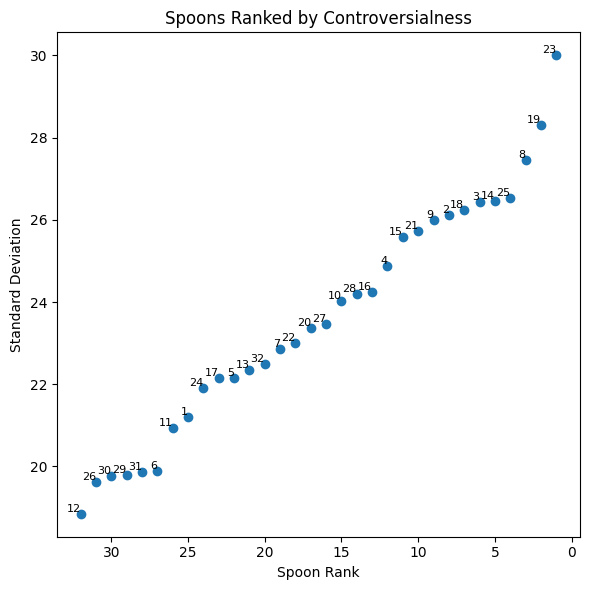

In [5]:
### Simple Stats
# Most controversial and least controversial spoons
print("Spoons sorted by standard deviation!")
spoon_stds = data.drop(columns='Name').std().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
x_vals = range(1, len(spoon_stds) + 1)
plt.scatter(x_vals, spoon_stds)

# Add text labels for each point (spoon name)
for x, y, label in zip(x_vals, spoon_stds, spoon_stds.index):
    short_label = label.replace("Spoon ", "")
    plt.text(x, y, short_label, fontsize=8, ha='right', va='bottom')

plt.xlabel("Spoon Rank")
plt.gca().invert_xaxis()
plt.ylabel("Standard Deviation")
plt.title("Spoons Ranked by Controversialness")
plt.tight_layout()
plt.show()

#print(spoon_stds) #Uncomment for full list and values

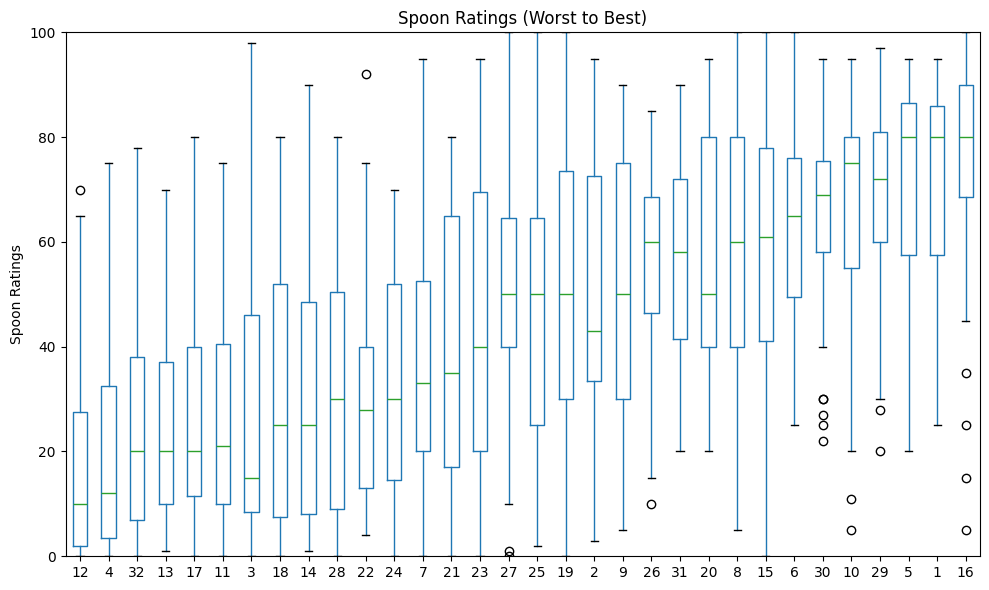

In [6]:
### Box and Whisker Plots
scores = data.drop(columns='Name')
spoon_means = scores.mean()
sorted_columns = spoon_means.sort_values().index
sorted_scores = scores[sorted_columns]

# Prepare x-axis labels
short_labels = [col.replace("Spoon ", "") for col in sorted_columns]

plt.figure(figsize=(10, 6))
sorted_scores.columns = short_labels  # Temporarily rename columns for plot
sorted_scores.boxplot(grid=False)     
plt.xticks(rotation=0)                
plt.ylabel("Spoon Ratings")
plt.ylim(0, 100)
plt.title("Spoon Ratings (Worst to Best)")
plt.tight_layout()
plt.show()

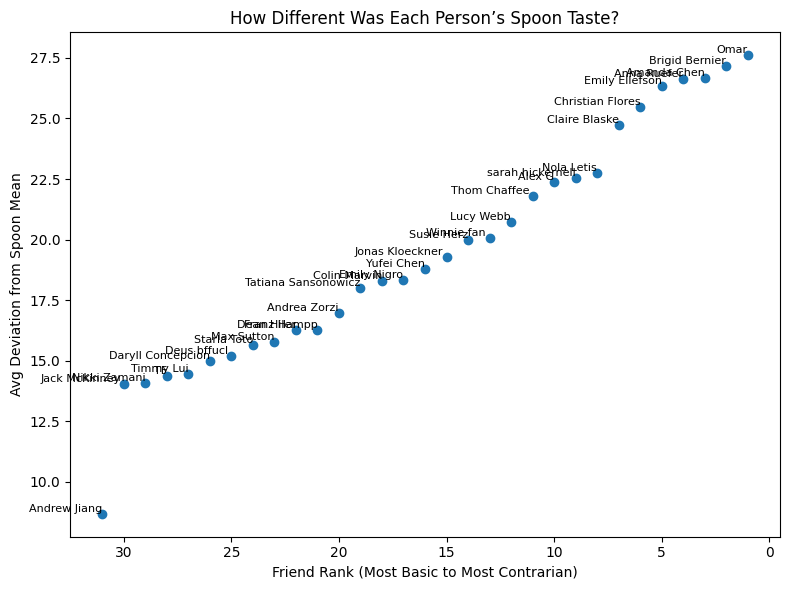

In [7]:
### Basicness vs Contrarianness
scores = data.drop(columns='Name')
spoon_means = scores.mean()
abs_deviation = (scores - spoon_means).abs()
person_deviation = abs_deviation.mean(axis=1)
person_deviation.index = data['Name']
person_deviation = person_deviation.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
x_vals = range(1, len(person_deviation) + 1)
plt.scatter(x_vals, person_deviation)
for x, y, label in zip(x_vals, person_deviation, person_deviation.index):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')
plt.xlabel("Friend Rank (Most Basic to Most Contrarian)")
plt.ylabel("Avg Deviation from Spoon Mean")
plt.title("How Different Was Each Person’s Spoon Taste?")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

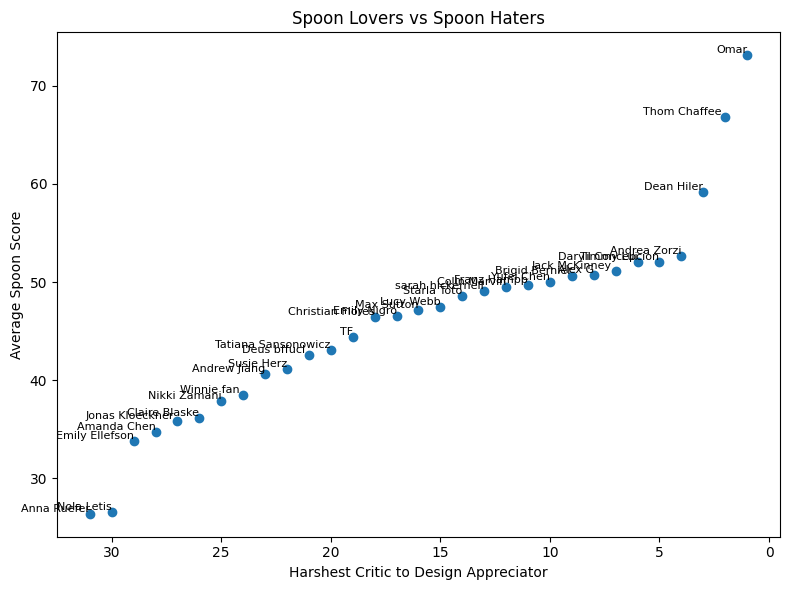

In [8]:
### Average score to determine general spoon lovers vs haters
person_avg = scores.mean(axis=1)
person_avg.index = data['Name']
person_avg = person_avg.sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
x_vals = range(1, len(person_avg) + 1)
plt.scatter(x_vals, person_avg)

for x, y, label in zip(x_vals, person_avg, person_avg.index):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.xlabel("Harshest Critic to Design Appreciator")
plt.ylabel("Average Spoon Score")
plt.title("Spoon Lovers vs Spoon Haters")
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

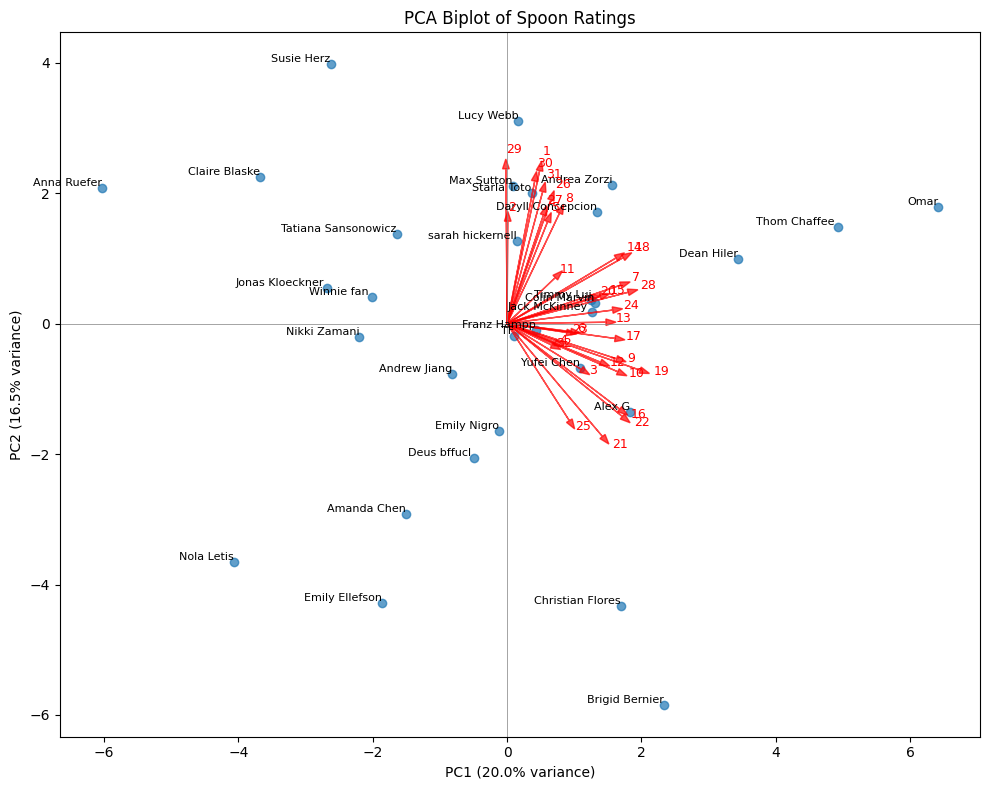

In [9]:
### Biplot
# PCs to plot
pc_x = 1   - 1 # -1 is bc of indexing
pc_y = 2   - 1 # -1 is bc of indexing

# Prepare the data
scores = data.drop(columns='Name')
names = data['Name']
spoon_labels = scores.columns

# Scaling for PCA
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)

# PCA
pca = PCA(n_components=10)
pca_scores = pca.fit_transform(scores_scaled)
components = pca.components_

# Plot
plt.figure(figsize=(10, 8))

# Persons as points
plt.scatter(pca_scores[:, pc_x], pca_scores[:, pc_y], alpha=0.7)
for i, name in enumerate(names):
    plt.text(pca_scores[i, pc_x], pca_scores[i, pc_y], name, fontsize=8, ha='right', va='bottom')

# Spoons as arrows, scaled
for i, spoon in enumerate(spoon_labels):
    x = components[pc_x, i] * 7 
    y = components[pc_y, i] * 7
    plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.1)
    plt.text(x * 1.1, y * 1.1, spoon.replace("Spoon ", ""), color='red', fontsize=9)

plt.xlabel(f"PC{pc_x + 1} ({pca.explained_variance_ratio_[pc_x]*100:.1f}% variance)")
plt.ylabel(f"PC{pc_y + 1} ({pca.explained_variance_ratio_[pc_y]*100:.1f}% variance)")
plt.title("PCA Biplot of Spoon Ratings")
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(False)
plt.tight_layout()
plt.show()

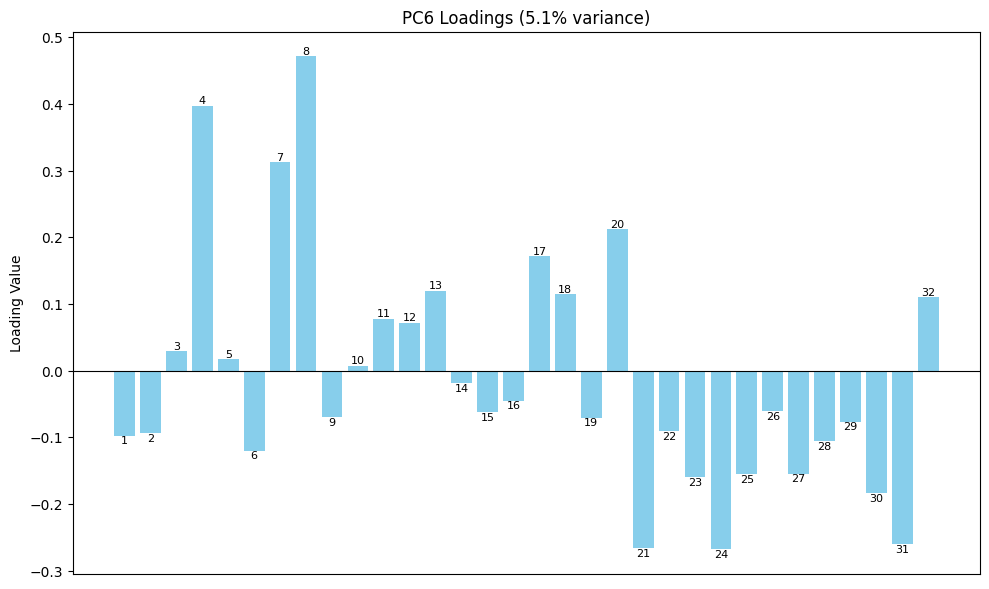

In [10]:
### PC Loadings for 1 PC
# Prepare data
scores = data.drop(columns='Name')
spoon_labels = scores.columns.str.replace("Spoon ", "")  # show only spoon numbers

# Scale and PCA
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)
pca = PCA()
pca.fit(scores_scaled)

# Get loadings
loadings = pd.DataFrame(pca.components_.T,
                        index=spoon_labels,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Choose which PC to plot
pc = 'PC6'  

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(loadings)), loadings[pc], color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)
plt.title(f"{pc} Loadings ({pca.explained_variance_ratio_[int(pc[2:]) - 1]*100:.1f}% variance)")
plt.ylabel("Loading Value")
plt.xticks([])  

for bar, label in zip(bars, loadings.index):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label,
             ha='center', va=va, fontsize=8)

plt.tight_layout()
plt.show()

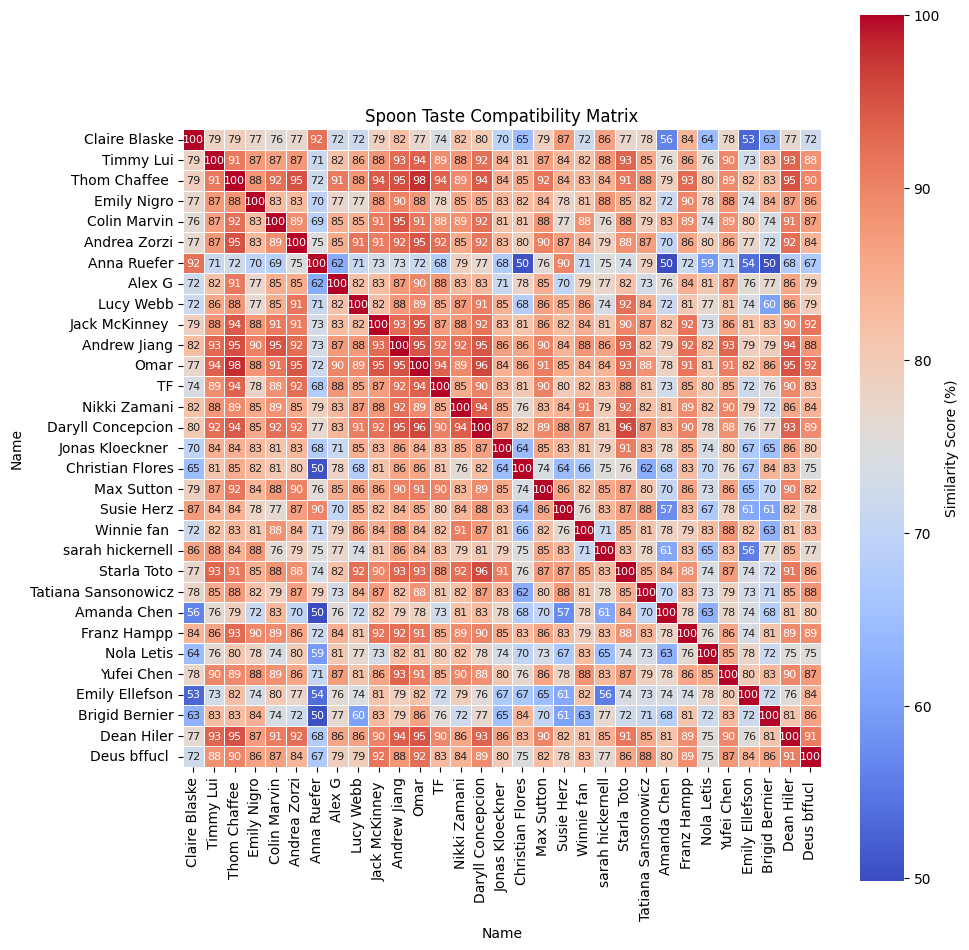

In [11]:
### Compatibility score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

scores = data.drop(columns='Name')
names = data['Name']

similarity_matrix = cosine_similarity(scores)

compatibility = pd.DataFrame(similarity_matrix, index=names, columns=names)
compatibility_scaled = compatibility * 100

# Plot
plt.figure(figsize=(10, 10))
sns.heatmap(
    compatibility_scaled,
    annot=True,
    fmt=".0f",  # 👈 No decimal places now
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Similarity Score (%)'},
    annot_kws={"size": 8}
)
plt.title("Spoon Taste Compatibility Matrix")
plt.tight_layout()
plt.show()

I think the scores are bad. People who generally like spoons, tend to be more similar in score and compatible. People who dont like spoons, tend to be more compatible. Same with PCA, PC1 is about how much you love or hate spoons. So thinking it might be good to normalize. Turn all scores into z-scores, hence that removes the bias from being a spoon hater or lover.

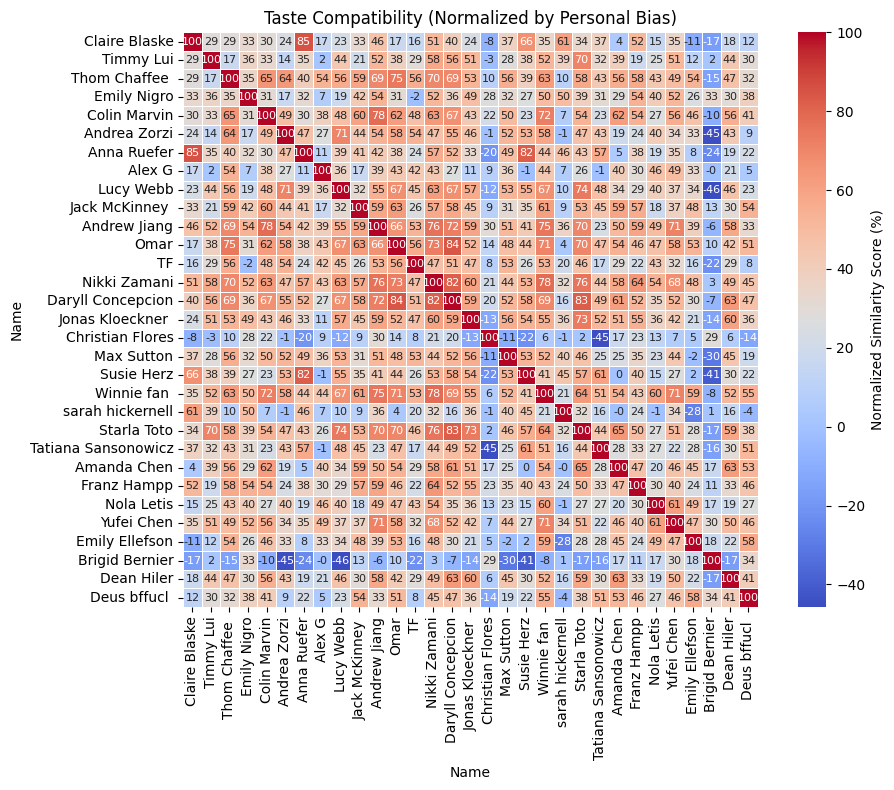

In [12]:
### Compatibility, but with normalization
scores = data.drop(columns='Name')
names = data['Name']

# Normalize
normalized = scores.sub(scores.mean(axis=1), axis=0)

compatibility_normalized = cosine_similarity(normalized)
compatibility_df = pd.DataFrame(compatibility_normalized, index=names, columns=names)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    compatibility_df * 100,
    annot=True,
    fmt=".0f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    annot_kws={"size": 8},
    cbar_kws={'label': 'Normalized Similarity Score (%)'}
)
plt.title("Taste Compatibility (Normalized by Personal Bias)")
plt.tight_layout()
plt.show()

In [18]:
### Get metrics of most and least compatible
pairs = []

for i, name1 in enumerate(compatibility_df.index):
    for j, name2 in enumerate(compatibility_df.columns):
        if i < j:  # upper triangle only, to avoid duplicates and self-pairs
            score = compatibility_df.iloc[i, j]
            pairs.append((name1, name2, score))

pairs_df = pd.DataFrame(pairs, columns=["Person A", "Person B", "Score"])
top_5 = pairs_df.sort_values("Score", ascending=False).head(7)
bottom_5 = pairs_df.sort_values("Score", ascending=True).head(7)

print("Top 5 Most Compatible Pairs:")
print(top_5)

print("\nBottom 5 Least Compatible Pairs:")
print(bottom_5)

Top 5 Most Compatible Pairs:
              Person A           Person B     Score
5        Claire Blaske        Anna Ruefer  0.853581
277               Omar  Daryll Concepcion  0.842638
335  Daryll Concepcion        Starla Toto  0.827522
176        Anna Ruefer         Susie Herz  0.823781
312       Nikki Zamani  Daryll Concepcion  0.822280
119       Colin Marvin       Andrew Jiang  0.780431
317       Nikki Zamani        Winnie fan   0.780349

Bottom 5 Least Compatible Pairs:
             Person A             Person B     Score
231         Lucy Webb       Brigid Bernier -0.456993
162      Andrea Zorzi       Brigid Bernier -0.448604
365  Christian Flores  Tatiana Sansonowicz -0.446462
396        Susie Herz       Brigid Bernier -0.405365
384        Max Sutton       Brigid Bernier -0.304908
416  sarah hickernell       Emily Ellefson -0.276712
186       Anna Ruefer       Brigid Bernier -0.243437


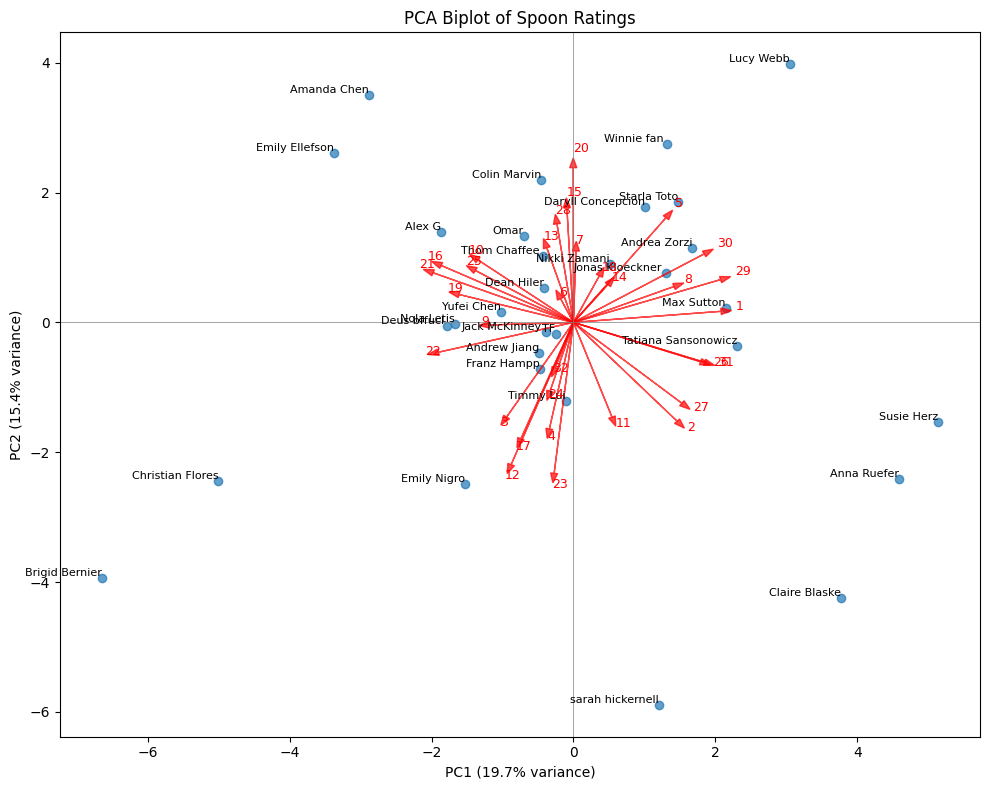

In [13]:
### Biplot, trying normalizing per person first

# PCs to plot
pc_x = 1   - 1 # -1 is bc of indexing
pc_y = 2   - 1 # -1 is bc of indexing

# Prepare the data
scores = data.drop(columns='Name')
scores = scores.sub(scores.mean(axis=1), axis=0)
names = data['Name']
spoon_labels = scores.columns

# Scaling for PCA
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)

# PCA
pca = PCA(n_components=10)
pca_scores = pca.fit_transform(scores_scaled)
components = pca.components_

# Plot
plt.figure(figsize=(10, 8))

# Persons as points
plt.scatter(pca_scores[:, pc_x], pca_scores[:, pc_y], alpha=0.7)
for i, name in enumerate(names):
    plt.text(pca_scores[i, pc_x], pca_scores[i, pc_y], name, fontsize=8, ha='right', va='bottom')

# Spoons as arrows, scaled
for i, spoon in enumerate(spoon_labels):
    x = components[pc_x, i] * 7 
    y = components[pc_y, i] * 7
    plt.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.1)
    plt.text(x * 1.1, y * 1.1, spoon.replace("Spoon ", ""), color='red', fontsize=9)

plt.xlabel(f"PC{pc_x + 1} ({pca.explained_variance_ratio_[pc_x]*100:.1f}% variance)")
plt.ylabel(f"PC{pc_y + 1} ({pca.explained_variance_ratio_[pc_y]*100:.1f}% variance)")
plt.title("PCA Biplot of Spoon Ratings")
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.grid(False)
plt.tight_layout()
plt.show()

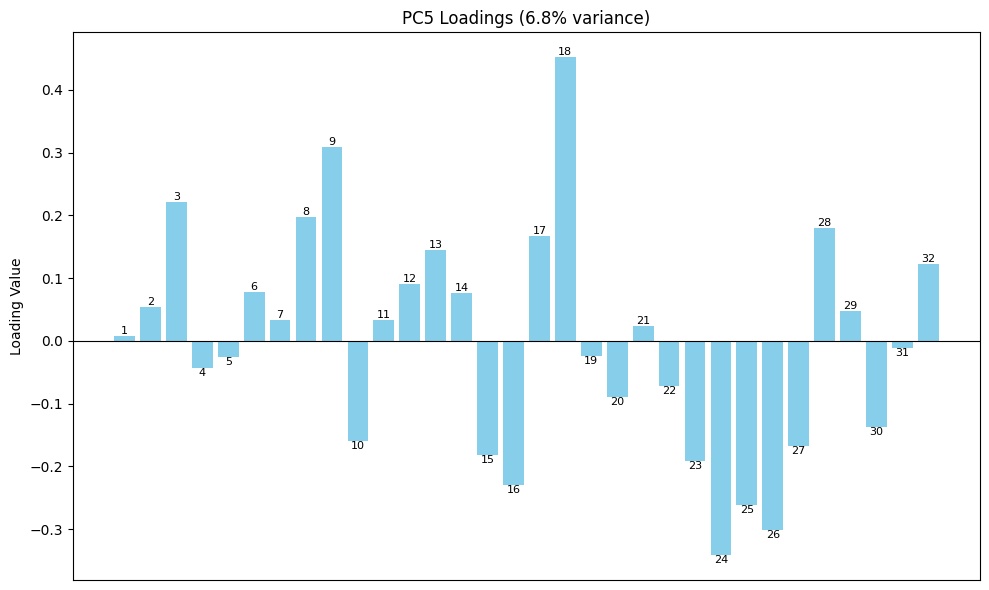

In [16]:
### PC Loadings for 1 PC (normalized)
# Prepare data
scores = data.drop(columns='Name')
scores = scores.sub(scores.mean(axis=1), axis=0) 
spoon_labels = scores.columns.str.replace("Spoon ", "")  # show only spoon numbers

# Scale and PCA
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)
pca = PCA()
pca.fit(scores_scaled)

# Get loadings
loadings = pd.DataFrame(pca.components_.T,
                        index=spoon_labels,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Choose which PC to plot
pc = 'PC5' 

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(loadings)), loadings[pc], color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)
plt.title(f"{pc} Loadings ({pca.explained_variance_ratio_[int(pc[2:]) - 1]*100:.1f}% variance)")
plt.ylabel("Loading Value")
plt.xticks([]) 

for bar, label in zip(bars, loadings.index):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width() / 2, height, label,
             ha='center', va=va, fontsize=8)

plt.tight_layout()
plt.show()